# Visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

## Data loading

In [2]:
pm25_05t = pd.read_json('pm25_05t.json')
pm25_50t = pd.read_json('pm25_50t.json')
pm25_52t = pd.read_json('pm25_52t.json')
pm25_53t = pd.read_json('pm25_53t.json')
pm25_59t = pd.read_json('pm25_59t.json')
pm25_61t = pd.read_json('pm25_61t.json')
pm25_standard = pd.read_json('pm25_05t.json')
pm25_standard.rename({'05t_PM2.5 (ug/m3)': 'std_PM2.5 (ug/m3)'}, axis='columns', inplace=True)
pm25_standard['std_PM2.5 (ug/m3)'] = 50
pm25_standard['24hr_average_PM2.5 (ug/m3)'] = 50
pm25_05t.head()

,05t_PM2.5 (ug/m3),24hr_average_PM2.5 (ug/m3),DateTime
0,25.78,25.780000,2018-01-01 00:00:00
1,18.94,22.360000,2018-01-01 01:00:00
2,16.83,20.516667,2018-01-01 02:00:00
3,11.90,18.362500,2018-01-01 03:00:00
4,9.07,16.504000,2018-01-01 04:00:00


In [3]:
station_var = [pm25_standard, pm25_05t, pm25_50t, pm25_52t,pm25_53t,pm25_59t,pm25_61t]
station_list = ['std','05t','50t', '52t', '53t', '59t', '61t']
for idx, station in enumerate(station_var):
    station.rename({station_list[idx]+'_PM2.5 (ug/m3)': 'PM2.5 (ug/m3)'}, axis='columns', inplace=True)
    station['station'] = station_list[idx]
    station['unit'] = 'subject'
    station['DateTime'] = station['DateTime'].apply(lambda x: mdates.date2num(x))
    station['PM2.5 (ug/m3)'] = pd.to_numeric(station['PM2.5 (ug/m3)'], errors='coerce')
#     mean_list = []
#     items_list = []
#     for idx2,x in enumerate(station['PM2.5 (ug/m3)']):
#         if not np.isnan(x):
#             items_list.append(x)
#         if len(items_list) > 20:
#             items_list.pop(0)
#         mean_24hr = np.mean(items_list)
#         mean_list.append(mean_24hr)
#     station['24hr_average_PM2.5 (ug/m3)'] = pd.Series(mean_list)
pm25 = pd.concat(station_var)
pm25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9181 entries, 0 to 1306
Data columns (total 5 columns):
24hr_average_PM2.5 (ug/m3)    9181 non-null float64
DateTime                      9181 non-null float64
PM2.5 (ug/m3)                 8320 non-null float64
station                       9181 non-null object
unit                          9181 non-null object
dtypes: float64(3), object(2)
memory usage: 430.4+ KB


In [4]:
pm25.dropna(inplace=True)
pm25.isnull().sum()

24hr_average_PM2.5 (ug/m3)    0
DateTime                      0
PM2.5 (ug/m3)                 0
station                       0
unit                          0
dtype: int64

In [5]:
pm25

,24hr_average_PM2.5 (ug/m3),DateTime,PM2.5 (ug/m3),station,unit
0,50.0000,736695.000000,50.00,std,subject
1,50.0000,736695.041667,50.00,std,subject
2,50.0000,736695.083333,50.00,std,subject
3,50.0000,736695.125000,50.00,std,subject
4,50.0000,736695.166667,50.00,std,subject
5,50.0000,736695.208333,50.00,std,subject
6,50.0000,736695.250000,50.00,std,subject
7,50.0000,736695.291667,50.00,std,subject
8,50.0000,736695.333333,50.00,std,subject
9,50.0000,736695.375000,50.00,std,subject


/Users/laamsang/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


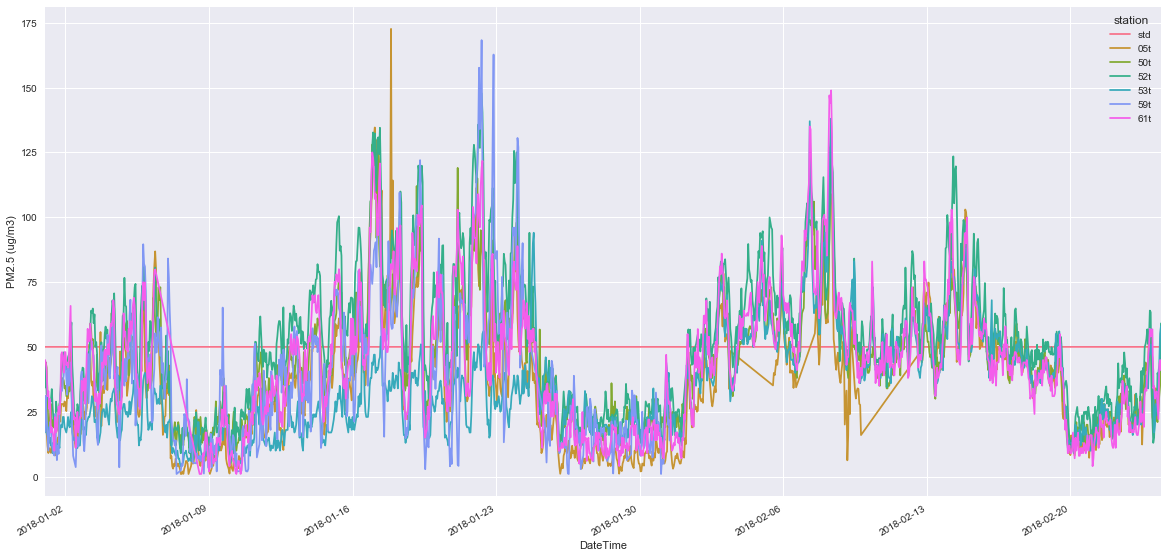

In [6]:
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.tsplot(data = pm25, time='DateTime', unit='unit', condition='station',value='PM2.5 (ug/m3)', ax=ax)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.show()

/Users/laamsang/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


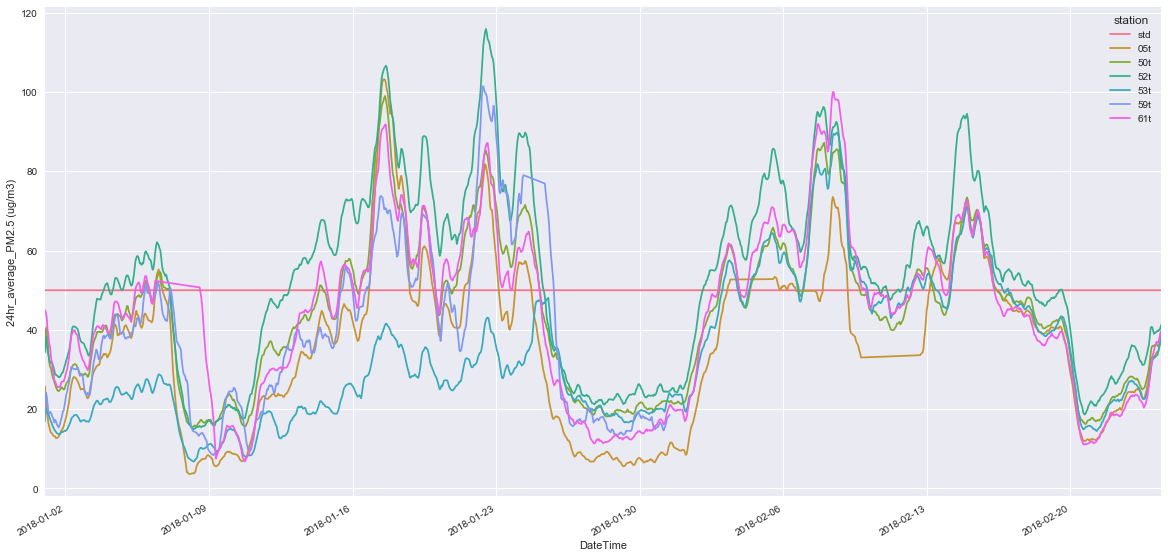

In [7]:
fig, ax = plt.subplots()
sns.tsplot(data = pm25, time='DateTime', unit='unit', condition='station',value='24hr_average_PM2.5 (ug/m3)', ax=ax)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.show()